In [4]:
!pip install scikit-learn

In [11]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay

In [13]:
data=load_breast_cancer()
x=data.data
y=data.target

In [14]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [15]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [17]:
print(x.shape)
print(y.shape)


(569, 30)
(569,)


In [18]:
k_size=0.25
r_seed=100
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=k_size,random_state=r_seed)
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (426, 30)
Shape of y_train (426,)
Shape of X_test (143, 30)
Shape of y_test (143,)


In [19]:
#Hold out method

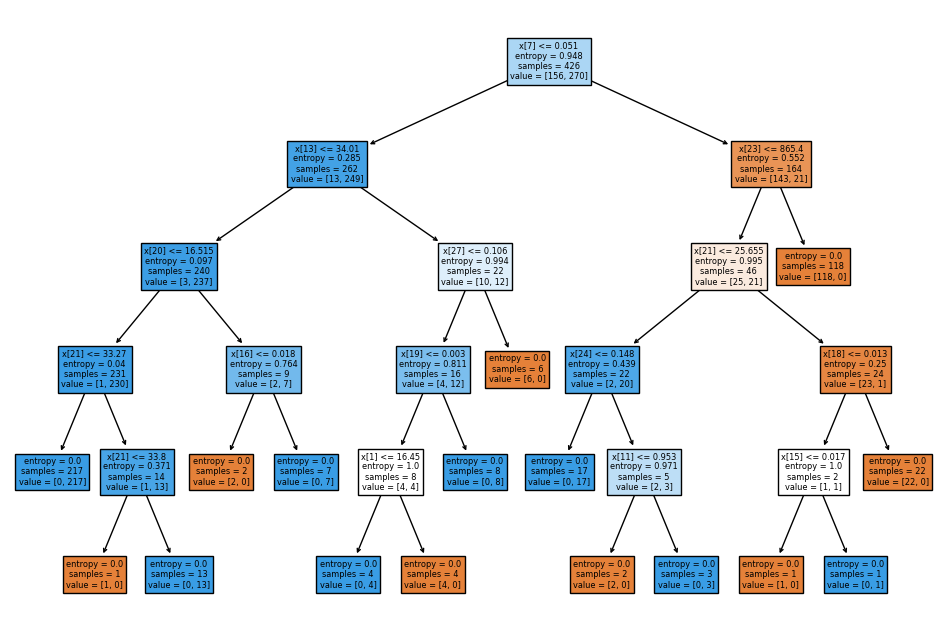

In [20]:
deci_tree =DecisionTreeClassifier(criterion ="entropy") # By default gini
deci_tree.fit(X_train,y_train)
prediction=deci_tree.predict(X_test)
from sklearn import tree 
plt.figure(figsize=(12, 8))
tree.plot_tree(deci_tree, filled=True)
plt.show()

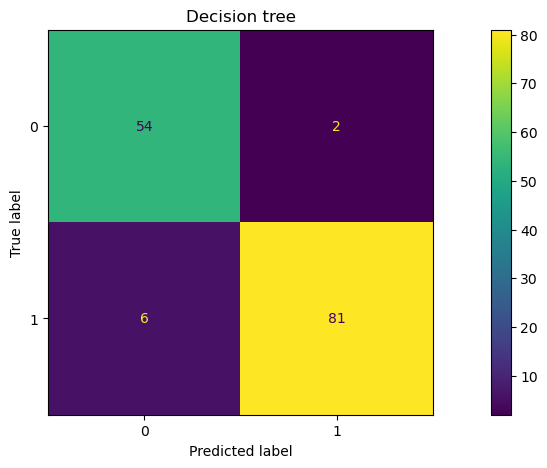

In [21]:
fig,(ax1)=plt.subplots()
fig.set_size_inches(15,5)
ax1.set_title("Decision tree")
ConfusionMatrixDisplay.from_estimator(deci_tree,X_test,y_test,ax=ax1)


In [22]:
accuracy_hold=accuracy_score(y_test,prediction)
a1= accuracy_hold*100
print( "Hold Out On Test Data (Decision Tree) ",a1 ,"%")

Hold Out On Test Data (Decision Tree)  94.4055944055944 %


In [23]:
print("Classification Report on the Test Data (Decision Tree) \n",classification_report(y_test,prediction))

Classification Report on the Test Data (Decision Tree) 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93        56
           1       0.98      0.93      0.95        87

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
prediction2 = knn.predict(X_test)
print("Accuracy ")
a = accuracy_score(y_test,prediction2)
a2 = a*100
print(a2)

Accuracy 
95.8041958041958


In [26]:
print("Classification Report on the Test Data (KNN) \n",classification_report(y_test,prediction2),"%")

Classification Report on the Test Data (KNN) 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        56
           1       0.99      0.94      0.96        87

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143
 %


In [28]:
from sklearn.naive_bayes import GaussianNB
#fitting the model
nb=GaussianNB()
nb.fit(X_train,y_train)
prediction_nb =nb.predict(X_test)

print("Accuracy of Test Data")
nb_score=accuracy_score(y_test,prediction_nb)

a3 = nb_score*100
print("Naive Bayes Accuracy :",a3,"%")
print("Classification report on test data")

Accuracy of Test Data
Naive Bayes Accuracy : 94.4055944055944 %
Classification report on test data


In [29]:
print(classification_report(y_test,prediction_nb))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        56
           1       0.94      0.97      0.95        87

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [30]:

#Cross validation


In [32]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(deci_tree,data.data,data.target,cv=5)
mean_accuracy =scores.mean()
    
a5 = mean_accuracy*100
print("Decision tree accuracy: " ,a5,"%")

Decision tree accuracy:  93.49945660611706 %


In [34]:
scores1 = cross_val_score(knn,data.data,data.target,cv=5)
mean_accuracy1 =scores1.mean()
     
a6 = mean_accuracy1*100
print("Knn accuracy: " ,a6,"%")

Knn accuracy:  92.79459711224965 %


In [36]:
scores2 = cross_val_score(nb,data.data,data.target,cv=5)
mean_accuracy2 =scores2.mean()
std_accuracy2=scores2.std()
     
a7 = mean_accuracy2*100
print("Cross Validation accuracy: " ,a7,"%")

Cross Validation accuracy:  93.85188635305074 %


In [37]:
#subsampling

In [39]:
import numpy as np
k=20
dta = []
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)
    deci_tree.fit(x_train, y_train)
    dta.append(deci_tree.score(x_test, y_test))
a4 = np.mean(dta)*100
print("Decision tree accuracy: " ,a4,"%")

Decision tree accuracy:  93.00699300699303 %


In [40]:
import numpy as np
k=20
dta = []
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)
    knn.fit(x_train, y_train)
    dta.append(knn.score(x_test, y_test))
a9 = np.mean(dta)*100
print("K-nearest accuracy: " ,a9,"%")

K-nearest accuracy:  92.0979020979021 %


In [41]:
import numpy as np
k=20
dta = []
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)
    nb.fit(x_train, y_train)
    dta.append(nb.score(x_test, y_test))
a10 = np.mean(dta)*100
print("Naive Bayes accuracy: " ,a10,"%")

Naive Bayes accuracy:  93.63636363636363 %


In [44]:



# analysis


import pandas as pd

In [45]:
print("\nACCURACIES OF DIFFERENT CLASSIFIERS WITH DIFFERENT METHODS:")
data= {
    "Hold Out" :[a1,a2,a3],
    "Cross Validation " :[a5,a6,a7],
    "Random Subsampling" :[a4,a9,a10]
}

df=pd.DataFrame(data,index=pd.Index(["Decision Tree" ,"K-Nearest","Naive Bayes"],name="CLASSIFIER"),columns=pd.Index(["Hold Out","Cross Validation " ,"Random Subsampling"]))
df


ACCURACIES OF DIFFERENT CLASSIFIERS WITH DIFFERENT METHODS:


,Hold Out,Cross Validation,Random Subsampling
CLASSIFIER,,,
Decision Tree,94.405594,93.499457,93.006993
K-Nearest,95.804196,92.794597,92.097902
Naive Bayes,94.405594,93.851886,93.636364
